<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/an_isothermical_chamical_reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: An Isothermal Chemical Reactor 

Author: JM

Date: december 2020 

Assume that two chemical species, A and B, are in a solvent feedstream entering a liquid-phase chemical reactor that is maintained at a constant temperature. The two species react irreversibly to form a third species, P. Find the reactor concentration of each species as a function of time. 

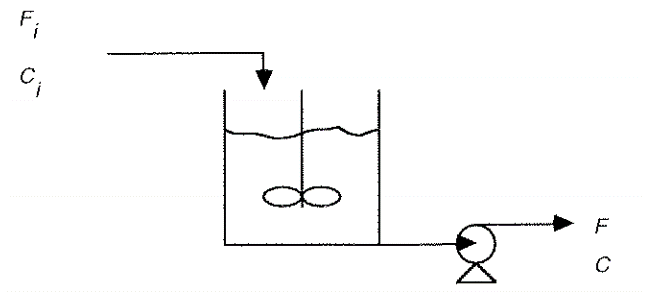

Assume that the stoichiometric equation for this reaction is 

$$ A + B \rightarrow 2P$$

### Overall Material Balance 
The overal material balance is (since the tank is perfectly mixed)

$$\frac{d(V \rho)}{dt} = F_{i} \rho - F \rho$$ 

Assumption: The liquid phase density, $\rho$, is not a function of concentration. The tank (and outlet) density is then equal to the inlet density, so:

$$\rho_{i} = \rho$$

$$\frac{dV}{dt} = F_{i} - F$$



### Component Meterial Balances

It is convenient to work in molar units when writing component balances, particularly if chemical reactions are involved. Let $C_{A}, C_{B}$, and $C_{P}$ represent the molar concentrations of $A, B$, and $P$ (moles/volume).

The component material balance equations are (assuming no component $P$ is in the feed to the reactor):

$$\frac{d(VC_{A})}{dt} = F_{i}C_{Ai} - FC_{A} + Vr_{A}$$

$$\frac{d(VC_{B})}{dt} = F_{i}C_{Bi} - FC_{B} + Vr_{B}$$

$$\frac{d(VC_{P})}{dt} = - FC_{P} + Vr_{P}$$

Where $r_{A}, r_{B}$, and $r_{P}$ represent the rate of generation of species $A, B$, and $P$ per unit volume, and $C_{Ai}$ and $C_{Bi}$ represent the inlet concentrations of species $A$ and $B$. Assume that the rate of reaction of A per unit volume is second-order and a function of the concentration of both $A$ and $B$. The reaction rate can be written

$$r_{A} = -kC_{A}C_{B}$$

where k is the reaction rate constant and the minus sign indicates that A is consumed in the reaction. Each mole of A reacts with one mole of B (from the stoichiometric equation) and produces two moles of P, so the rates of generation of B and P (per unit volume) are: 

$$r_{B} = -kC_{A}C_{B}$$

$$r_{P} = 2kC_{A}C_{B}$$

Considering this the balance equations are: 

$$\frac{dC_{A}}{dt} = \frac{F_{i}}{V} (C_{Ai} - C_{A}) - kC_{A}C_{B} $$

$$\frac{dC_{B}}{dt} = \frac{F_{i}}{V} (C_{Bi} - C_{B}) - kC_{A}C_{B} $$

$$\frac{dC_{P}}{dt} = -\frac{F_{i}}{V} C_{P} + 2kC_{A}C_{B} $$

This model consists of four differential equations and, therefore, four state variables $(V, C_{A}, C_{B}, C_{P})$.

In [130]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [201]:
# Establish model 
def my_model(s, t, qi):

  # parameters
  k = 0.01 

  # state variables
  V = s[0] # L
  ca = s[1] # mol/L
  cb = s[2] # mol/L
  cp = s[3] # mol/L

  # inputs
  cai = 20 # mol/L 
  cbi = 30 # mol/L
  q = 0.5 # L
  # qi # L

  # material balance
  dVdt = qi - q
  # species balance
  dcadt = qi/V*(cai - ca) - k*ca*cb
  dcbdt = qi/V*(cbi - cb) - k*ca*cb
  dcpdt = -qi/V*cp + 2*k*ca*cb

  return [dVdt, dcadt, dcbdt, dcpdt]

In [202]:
# initial conditions
V0 = 2
ca0 = 20
cb0 = 30
cp0 = 0
s = [V0, ca0, cb0, cp0]

In [203]:
# integration time
t = np.linspace(0,100,1000)

In [204]:
# inflow
Fi = np.ones(len(t))*0.5
Fi[500:750] = 1

In [205]:
# vectors for saving state
V = np.ones(len(t))*V0 
ca = np.ones(len(t))*ca0
cb = np.ones(len(t))*cb0
cp = np.ones(len(t))*cp0

In [206]:
for i in range(len(t)-1):
  # update time span
  ts = [t[i], t[i+1]]
  # solve ODEs
  out = odeint(my_model,s,ts,args=(Fi[i+1],))
  # Guardar resultados
  V[i+1] = out[-1][0]
  ca[i+1] = out[-1][1]
  cb[i+1]  = out[-1][2]
  cp[i+1]  = out[-1][3]
  # Ajustar condiciones iniciales para el siguiente ciclo
  s = out[-1]

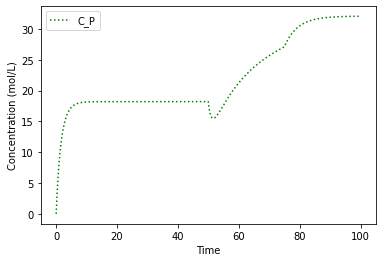

In [207]:
plt.plot(t,cp,"g:",label = "C_P")
plt.xlabel("Time")
plt.ylabel("Concentration (mol/L)")
plt.legend(loc = "best")

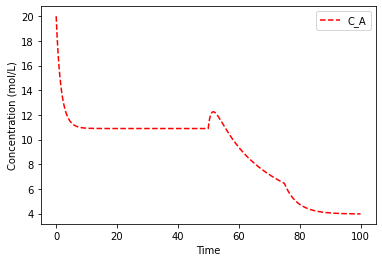

In [208]:
plt.plot(t,ca,"r--",label = "C_A")
plt.xlabel("Time")
plt.ylabel("Concentration (mol/L)")
plt.legend(loc = "best")

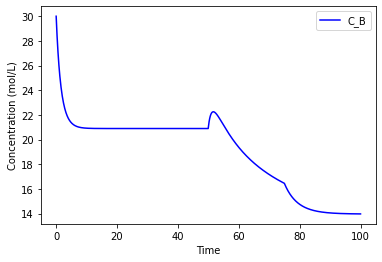

In [209]:
plt.plot(t,cb,"b-",label = "C_B")
plt.xlabel("Time")
plt.ylabel("Concentration (mol/L)")
plt.legend(loc = "best")

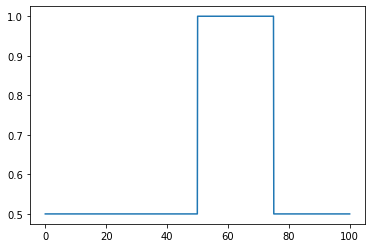

In [210]:
plt.plot(t,Fi)